Gunakan dataset retail.csv. Buatlah line chart dengan Matplotlib yang menampilkan jumlah pembeli harian selama bulan Desember.
Beberapa spesifikasi yang perlu diperhatikan yaitu sebagai berikut.
* Ukuran figure yaitu 10 X 5.
* Sumbu-x merupakan tanggal pembelian dari tanggal 1-31 Desember 2019.
* Sumbu-y merupakan jumlah unique customers di tiap tanggal.
* Title dan axis label wajib ada tulisan dan style-nya silakan disesuaikan sendiri.

#### Memanggil library di Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#### Membaca file CSV sebagai data frame

In [2]:
retail = pd.read_csv('retail.csv')

#### Memahami dataset

In [3]:
retail.shape

(5000, 9)

Dataset terdiri dari 5000 baris dan 9 kolom.

Menampilkan nama kolom dari dataset.

In [4]:
retail.columns.values

array(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price'], dtype=object)

Melihat preview data.

In [5]:
retail.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


#### Penambahan kolom order month pata dataset

In [6]:
retail['order_month'] = retail['order_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
retail.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10


#### Menampilkan jumlah pembeli harian selama bulan Desember

In [7]:
retail_december = retail[retail['order_month'] == '2019-12'].groupby('order_date')['customer_id'].nunique()
retail_december.reset_index()

,order_date,customer_id
0,2019-12-01,40
1,2019-12-02,27
2,2019-12-03,26
3,2019-12-04,26
4,2019-12-05,36
5,2019-12-06,28
6,2019-12-08,36
7,2019-12-09,31
8,2019-12-10,28
9,2019-12-11,33


#### Menampilkan line chart

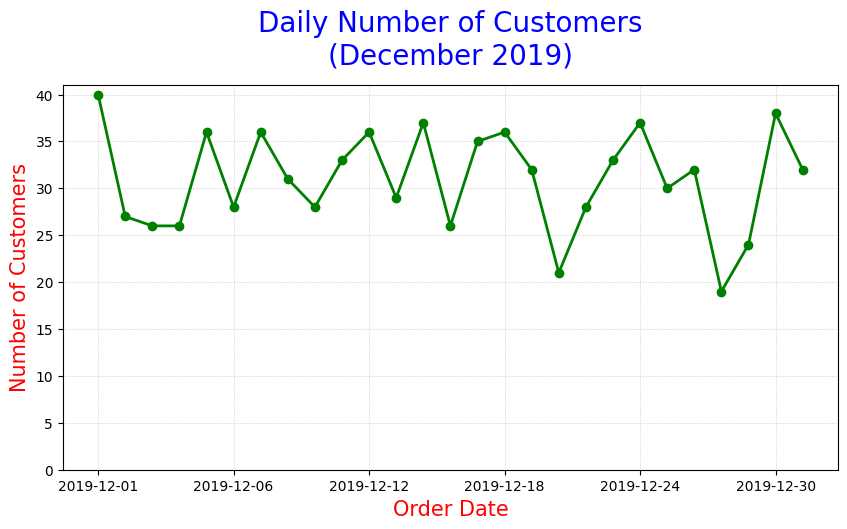

In [8]:
plt.figure(figsize = (10, 5))
retail_december.plot(color = 'green', linewidth = 2, marker = 'o')
plt.title('Daily Number of Customers\n(December 2019)', loc = 'center', pad = 15, fontsize = 20, color = 'blue')
plt.xlabel('Order Date', fontsize = 15, color = 'red')
plt.ylabel('Number of Customers', fontsize = 15, color = 'red')
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.4)
plt.ylim(ymin = 0)
plt.show()